In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("data.csv", index_col="Date")

In [46]:
df = data.copy()
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10, test_size=14) #model needs to predict up to two weeks into future
#for train_index, test_index in tscv.split(df):
     #print("TRAIN:", train_index, "TEST:", test_index)
train1 = df.iloc[list(tscv.split(df))[0][0]]
test1 = df.iloc[list(tscv.split(df))[0][1]]
train2 = df.iloc[list(tscv.split(df))[1][0]]
test2 = df.iloc[list(tscv.split(df))[1][1]]

In [50]:
def window_input_output(input_length: int, output_length: int, data: pd.DataFrame) -> pd.DataFrame:
    df = data.copy()[["Close"]] 
    
    # Adjust the input columns to get the current day's close as the last input feature
    for i in range(1, input_length):
        df[f'x_{i}'] = df['Close'].shift(i)

    # Get the next 14 days for response values
    for j in range(output_length):
        df[f'y_{j}'] = df['Close'].shift(-j-1)
    
    df = df.dropna(axis=0)
    return df

window_df = window_input_output(60, 14, data)

In [52]:
X_cols = [col for col in window_df.columns if col.startswith('x')]
X_cols.insert(0, 'Close')
y_cols = [col for col in window_df.columns if col.startswith('y')]
X_train = window_df[X_cols][:-60].values
y_train = window_df[y_cols][:-60].values
X_test = window_df[X_cols][-60:].values
y_test = window_df[y_cols][-60:].values #arbitrary split just for now

Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_seq = DecisionTreeRegressor(random_state=42)
dt_seq.fit(X_train, y_train)
dt_seq_preds = dt_seq.predict(X_test)

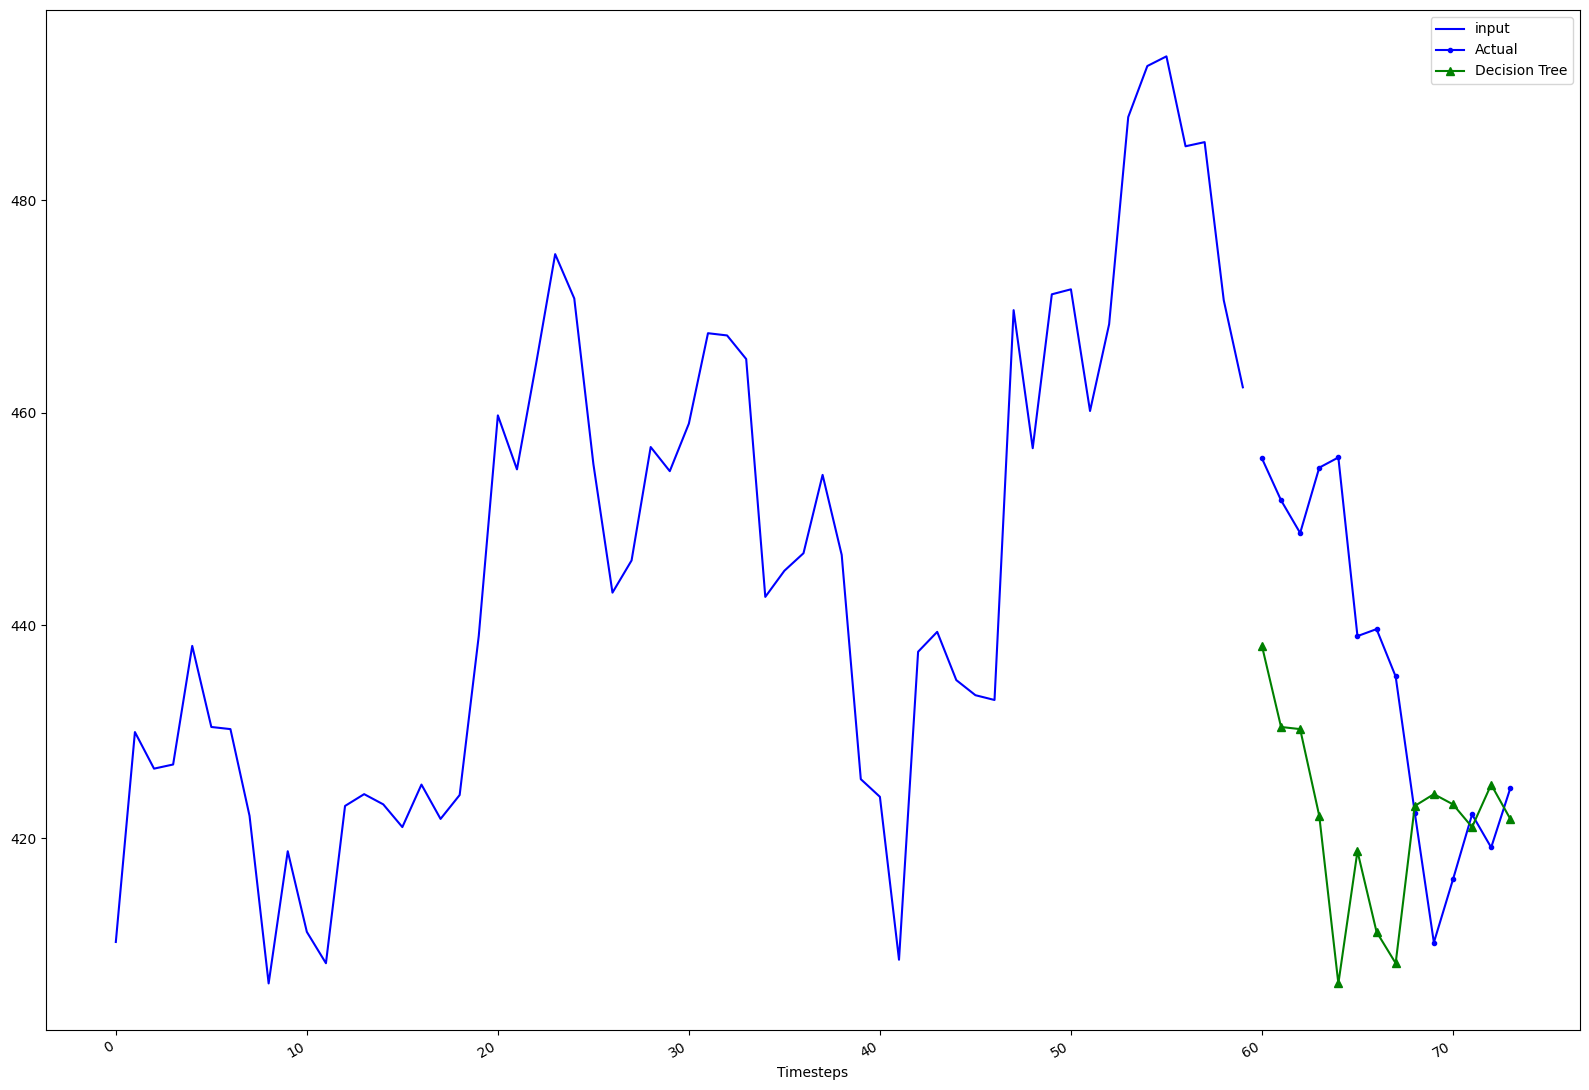

In [62]:
fig, ax = plt.subplots(figsize=(16, 11))

ax.plot(np.arange(59, -1, -1), X_test[50], 'b-', label='input')
ax.plot(np.arange(60, 74, 1), y_test[50], marker='.', color='blue', label='Actual')
ax.plot(np.arange(60, 74, 1), dt_seq_preds[50], marker='^', color='green', label='Decision Tree')

ax.set_xlabel('Timesteps')
plt.legend()

fig.autofmt_xdate()
plt.tight_layout()